# Introduction

This notebook is a compact, reproducible **segmentation evaluation review** comparing **DeepLabV3** and **U-Net** on a few small, easy-to-run datasets.
It’s designed so you can run quick experiments, reproduce the baselines, and produce the figures/tables needed for paper comparison, ablations, inference and cross-evaluation.

---

## What this notebook can do

* Train **U-Net** and **DeepLabV3** with configurable hyperparameters (backbone, input size, optimizer, loss, etc.).
* Work on three datasets: **Cityscapes**, **Kvasir-SEG**, **Supervisely Person**.
* Save / load checkpoints.
* Evaluate models (mIoU, per-class IoU, Dice, pixel accuracy), produce per-image IoU lists for statistical tests.
* Run the small, prioritized **ablation** suite and cross-evaluation (train on Kvasir-SEG → test on Supervisely Person).
* Produce plots and tables for the report (per-class scatter, mIoU bar charts, qualitative examples).

By tuning these variables in the config section the user can choose which application is to be done by this notebook.
```
TRAIN = False # False for evaluation and model loading (models required as input), True for training the models

DATASET = "Kvasir" # Choose " Cityscapes", " Supervisely", "Kvasir", 

MODEL = "DeeplabV3" # Choose "DeeplabV3" or "Unet"
```

Ensure that the `model` variable is updated appropriately in both the evaluation and visualization sections.
```
model = deeplabv3_cityscapes
```
To see the available trained models refer to the [Experiment Table and Models Names](#experiment-table-and-models-names) section.

---

## Models

* **DeepLabV3**: encoder/ASPP based; strong for multi-class semantic tasks (paper: Chen et al.).

  * SMP docs: `segmentation_models_pytorch` DeepLabV3 implementation.
* **U-Net**: encoder-decoder with skip connections; effective for boundary & small-object segmentation (paper: Ronneberger et al.).

  * SMP docs: `segmentation_models_pytorch` U-Net implementation.

---

## Datasets (used as examples)

* **Cityscapes (subset)**:  multi-class urban scenes, good for DeepLab paper comparison (20 classes, 3116 images). 
* **Kvasir-SEG (full dataset)**: polyp segmentation (binary, 1000 images).
* **Supervisely Person (subset)**: person segmentation (binary, 2667 images).

> Note: Kvasir-SEG and Supervisely Person are binary (object vs background). We use Kvasir-SEG→Supervisely Person cross-evaluation (train on Kvasir-SEG, test on Supervisely Person) to measure domain generalization.

---

## Metrics (computed for both models)

* **mIoU (mean Intersection over Union)**: primary metric (especially for DeepLab).
* **Per-class IoU**: to inspect class-wise performance.
* **Dice coefficient (Sørensen–Dice / F1)**: useful for U-Net and small-object sensitivity.
* **Per-class Dice coefficient**: to inspect class-wise performance.
* **Pixel accuracy**: reported but interpreted cautiously (can be misleading with imbalanced classes).
---

## Baseline Experiments (required)

These represent the default, reproducible configurations:

* **U-Net**

  * Encoder: *ResNet-50*
  * Weights: *ImageNet pretrained*
  * Input size: 256

* **DeepLabV3**

  * Backbone: *ResNet-50*
  * Weights: *ImageNet pretrained*
  * Output stride: 8
  * Input size: 256

These baselines are trained and evaluated normally on each dataset used.

---

## Ablations and Hyperparameter (small set)

These provide meaningful comparison without producing too many runs.

### **DeepLabV3**

* **Backbone depth:** `resnet50` → `resnet101`
* **Output stride:** `OS=8` → `OS=16`

### **U-Net**

* **Encoder initialization:** pretrained (`imagenet`) → random init (`None`)
* **Input resolution:** 256 → 512

---

## Cross-evaluation (generalization drop)

To measure dataset shift:

* **Train on dataset Kvasir-SEG → Evaluate on dataset Supervisely Person**
  Useful to observe how each model behaves outside its training domain.

---

# Experiment Table and Models Names

Below is a clear description of every model name used in the notebook, explaining what each experiment corresponds to and how the model was trained.

| Model Name                 | Model      | TrainedOn  | EvalOn     | Backbone  | Pretrained | OutputStride | InputSize | Notes                 |
| -------------------------- | ---------- | ---------- | ---------- | --------- | ---------- | ------------ | --------- | --------------------- |
| deeplabv3_cityscapes       | DeepLabV3 | Cityscapes | Cityscapes | resnet50  | imagenet   | 8            | 256       | Baseline              |
| deeplabv3_101_cityscapes   | DeepLabV3 | Cityscapes | Cityscapes | resnet101 | imagenet   | 8            | 256       | Ablation (backbone)   |
| deeplabv3_os16_cityscapes  | DeepLabV3 | Cityscapes | Cityscapes | resnet50  | imagenet   | 16           | 256       | Hyperparameter (OS)         |
| deeplabv3_kvasir           | DeepLabV3 | Kvasir     | Kvasir     | resnet50  | imagenet   | 8           | 256       | Baseline              |
| unet_cityscapes            | U-Net      | Cityscapes | Cityscapes | resnet50  | imagenet   | N/A          | 256       | Baseline              |
| unet_noimagenet_cityscapes | U-Net      | Cityscapes | Cityscapes | resnet50  | None       | N/A          | 256       | Ablation (init)       |
| unet_kvasir                | U-Net      | Kvasir     | Kvasir     | resnet50  | imagenet   | N/A          | 256       | Baseline              |
| unet_512_kvasir            | U-Net      | Kvasir     | Kvasir     | resnet50  | imagenet   | N/A          | 512       | Hyperparameter (input size) |

---

## Requirements / Dependencies

This notebook requires several external resources in order to reproduce all experiments.
Please download the following items before running the notebook:

### **1. Pretrained models, evaluation CSVs, and inference visualizations**

A single folder containing:

* pretrained models used in the experiments
* all evaluation result files (`.csv`)
* inference visualizations generated during validation/testing

**Download or include:**
    `https://www.kaggle.com/datasets/ramiaridi/ce6190-segmentation-review-unet-deeplabv3-dataset`

Place the contents in a folder accessible by the notebook.

---

### **2. Datasets Used in This Notebook**

These are the exact datasets (and mirrors/subsets) used for training and evaluation:

* **Cityscapes (subset)**
    `https://www.kaggle.com/datasets/xiaose/cityscapes`

* **Kvasir-SEG (full dataset)**
    `https://www.kaggle.com/datasets/abdallahwagih/kvasir-dataset-for-classification-and-segmentation`

* **Supervisely Person (subset)**
    `https://www.kaggle.com/datasets/tapakah68/supervisely-filtered-segmentation-person-dataset`

Make sure the folder structure inside each dataset is preserved exactly as downloaded.

---

## Python Requirements

To run this notebook, the following Python packages must be installed in the environment:

### **Core utilities**

* `os`
* `math`
* `random`
* `warnings`
* `glob`

### **Data handling & scientific computing**

* `numpy`
* `pandas`

### **Image processing**

* `Pillow` (PIL)

### **Visualization**

* `matplotlib`

### **PyTorch ecosystem**

* `torch`
* `torch.nn`
* `torch.nn.functional`
* `torch.optim`
* `torch.utils.data`
* `torchvision`
* `torchvision.transforms`
* `torchvision.transforms.functional`
* `torchvision.transforms.InterpolationMode`

### **Progress bars**

* `tqdm` (with `tqdm.auto` recommended)

### **Interactive widgets**

* `ipywidgets`

### **Segmentation models**

* `segmentation_models_pytorch` (SMP)
  *(required for DeepLabV3 and U-Net implementations)*

---

# Dependencies

In [ ]:
## Dependencies
!pip install segmentation-models-pytorch


In [ ]:
# Librairies

import os
import math
import random

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

!pip install ipywidgets
from tqdm.auto import tqdm

from collections import Counter

import warnings
warnings.filterwarnings('ignore')


# Config

In [13]:
# ---------------------- CONFIG ----------------------

TRAIN = False # False for evaluation and model loading (models required as input), True for training the models

DATASET = "Cityscapes" # Choose " Cityscapes", " Supervisely", "Kvasir", 

MODEL = "DeeplabV3" # Choose "DeeplabV3" or "Unet"

models_pth = "/kaggle/input/ce6190-segmentation-review-unet-deeplabv3-dataset/trained-models-weights/trained-models-weights" # To load pretrained Models


if DATASET == "Cityscapes":
    base_dir = "/kaggle/input/cityscapes/Cityspaces"
elif DATASET == "Supervisely":
    base_dir = "/kaggle/input/supervisely-filtered-segmentation-person-dataset"
elif DATASET == "Kvasir":
    base_dir = "/kaggle/input/kvasir-dataset-for-classification-and-segmentation/kvasir-seg/Kvasir-SEG"
else:
    print("Choose DATASET = <Cityscapes> OR <Supervisely> OR <Kvasir>")
    
config = {
    # set these to your Cityscapes root (folder containing 'images' and 'gtFine')
    "BASE_DIR": base_dir,  
    "IMG_SIZE": 256,
    "BATCH_SIZE": 16,
    "NUM_WORKERS": 8,
    "NUM_CLASSES": 2 if DATASET == "Supervisely" or DATASET == "Kvasir" else 20,
    "BACKBONE": "resnet50",
    "PRETRAINED": "imagenet",
    "LR": 1e-4,
    "WEIGHT_DECAY": 1e-4,
    "OPTIMIZER": "adam",
    "EPOCHS": 50,
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
    "IGNORE_INDEX": 255,
    "CHECKPOINT_PATH": "best_deeplab.pth",
}

MEAN = [0.485, 0.456, 0.406]
STD  = [0.229, 0.224, 0.225]

# Model Load (if available)

In [7]:
if not TRAIN:
    import segmentation_models_pytorch as smp
    
    ## ============ DeeplabV3 models ============
    # BASELINE - Cityscape Dataset
    deeplabv3_cityscapes = smp.DeepLabV3( 
        encoder_name="resnet50",
        encoder_weights="imagenet",
        in_channels=3,
        classes=20,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/deeplabv3-cityscapes.pth", map_location=config["DEVICE"])
    deeplabv3_cityscapes.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded deeplabv3_cityscapes model successfully. BASELINE")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    
    # ABLATION
    deeplabv3_101_cityscapes = smp.DeepLabV3(
        encoder_name="resnet101",
        encoder_weights="imagenet",
        in_channels=3,
        classes=20,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/deeplabv3-101-cityscapes.pth", map_location=config["DEVICE"])
    deeplabv3_101_cityscapes.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded deeplabv3_101_cityscapes model successfully. ABLATION")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    
    # ABLATION
    deeplabv3_os16_cityscapes = smp.DeepLabV3(
        encoder_name="resnet50",
        encoder_weights="imagenet",
        in_channels=3,
        encoder_output_stride=16,
        classes=20,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/deeplabv3-os16-cityscapes.pth", map_location=config["DEVICE"])
    deeplabv3_os16_cityscapes.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded deeplabv3_os16_cityscapes model successfully. ABLATION")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    # BASELINE - Kvasir Dataset
    deeplabv3_kvasir = smp.DeepLabV3(
        encoder_name="resnet50",
        encoder_weights="imagenet",
        in_channels=3,
        classes=2,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/deeplabv3-kvasir.pth", map_location=config["DEVICE"])
    deeplabv3_kvasir.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded deeplabv3_kvasir model successfully. BASELINE")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    
    
    
    # ============ Unet Models ============
    # BASELINE - Cityscape Dataset
    unet_cityscapes = smp.Unet(
        encoder_name="resnet50",
        encoder_weights="imagenet",
        in_channels=3,
        classes=20,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/unet-cityscapes-0.pth", map_location=config["DEVICE"])
    unet_cityscapes.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded unet_cityscapes model successfully. BASELINE")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    # ABLATION
    unet_noimagenet_cityscapes = smp.Unet(
        encoder_name="resnet50",
        encoder_weights=None,
        in_channels=3,
        classes=20,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/unet-noimagenet-cityscapes.pth", map_location=config["DEVICE"])
    unet_noimagenet_cityscapes.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded unet_noimagenet_cityscapes model successfully. ABLATION")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    # BASELINE - Kvasir Dataset
    unet_kvasir = smp.Unet(
        encoder_name="resnet50",
        encoder_weights="imagenet",
        in_channels=3,
        classes=2,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/unet-kvasir.pth", map_location=config["DEVICE"])
    unet_kvasir.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded unet_kvasir model successfully. BASELINE")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    
    
    # ABLATION, MAKE SURE IMG_SIZE input is 512
    unet_512_kvasir = smp.Unet(
        encoder_name="resnet50",
        encoder_weights="imagenet",
        in_channels=3,
        classes=2,
    ).to(config["DEVICE"])
    checkpoint = torch.load(f"{models_pth}/unet-512-kvasir.pth", map_location=config["DEVICE"])
    unet_512_kvasir.load_state_dict(checkpoint["model_state"])
    print(f"\n✅ Loaded unet_512_kvasir model successfully. ABLATION")
    print("Best Epoch: ", checkpoint["epoch"], "mIoU: ", checkpoint["miou"])
    



✅ Loaded deeplabv3_cityscapes model successfully. BASELINE
Best Epoch:  16 mIoU:  0.5170601606369019

✅ Loaded deeplabv3_101_cityscapes model successfully. ABLATION
Best Epoch:  29 mIoU:  0.5127522945404053

✅ Loaded deeplabv3_os16_cityscapes model successfully. ABLATION
Best Epoch:  29 mIoU:  0.46478182077407837

✅ Loaded deeplabv3_kvasir model successfully. BASELINE
Best Epoch:  13 mIoU:  0.883033275604248

✅ Loaded unet_cityscapes model successfully. BASELINE
Best Epoch:  38 mIoU:  0.48312291502952576

✅ Loaded unet_noimagenet_cityscapes model successfully. ABLATION
Best Epoch:  38 mIoU:  0.3211841881275177

✅ Loaded unet_kvasir model successfully. BASELINE
Best Epoch:  17 mIoU:  0.8819679021835327

✅ Loaded unet_512_kvasir model successfully. ABLATION
Best Epoch:  26 mIoU:  0.8764843940734863


# DataLoading

In [8]:
## Cityscapes

import os
import numpy as np
import pandas as pd

# ---------------- helper: pair cityscapes images <-> masks (outside dataset) ----------
def get_cityscapes_pairs(root, split="train", use_labelTrainIds=True):
    """
    return two lists (img_paths, mask_paths) for Cityscapes layout:
      images/<split>/<city>/*_leftImg8bit.png
      gtFine/<split>/<city>/*_gtFine_labelTrainIds.png (recommended)
    """
    img_pattern = os.path.join(root, "images", split, "*", "*_leftImg8bit.png")
    img_paths = sorted(glob(img_pattern))
    if not img_paths:
        raise RuntimeError(f"No images found with {img_pattern}")

    mask_paths = []
    for p in img_paths:
        city = os.path.basename(os.path.dirname(p))
        stem = os.path.basename(p).replace("_leftImg8bit.png", "")
        mask_name = stem + ("_gtFine_labelTrainIds.png" if use_labelTrainIds else "_gtFine_labelIds.png")
        mask_p = os.path.join(root, "gtFine", split, city, mask_name)
        if not os.path.exists(mask_p):
            raise FileNotFoundError(f"Mask not found: {mask_p}\nfor image: {p}")
        mask_paths.append(mask_p)
    return img_paths, mask_paths
from sklearn.model_selection import train_test_split

def get_supervisely_pairs(csv_path: str,
                          image_col: str = "images",
                          mask_col: str  = "masks",
                          collage_col: str = "collages",
                          base_dir: str = None,
                          split: str = "train",
                          test_size: float = 0.2,
                          random_state: int = 42
                         ):
    """
    Reads the CSV file and returns image/mask/collage paths for train or val split.
    
    Parameters:
    - csv_path: path to CSV
    - image_col, mask_col, collage_col: column names
    - base_dir: optional base directory to prepend
    - split: 'train' or 'val'
    - test_size: fraction of data to use as validation
    - random_state: for reproducibility
    
    Returns:
    - list of tuples (image_path, mask_path, collage_path) for the requested split
    """
    
    df = pd.read_csv(csv_path)
    pairs = [(row[image_col], row[mask_col], row[collage_col]) for _, row in df.iterrows()]

    # Apply base_dir if provided
    if base_dir:
        base_dir = f"{base_dir}/supervisely_person_clean_2667_img/supervisely_person_clean_2667_img"
        pairs = [(f"{base_dir}/{img}", f"{base_dir}/{mask}", f"{base_dir}/{collage}")
                 for img, mask, collage in pairs]

    # Split train/val
    train_pairs, val_pairs = train_test_split(pairs, test_size=test_size, random_state=random_state)
    
    if split.lower() == "train":
        return train_pairs
    elif split.lower() == "val":
        return val_pairs
    else:
        raise ValueError("split must be 'train' or 'val'")


def get_kvasir_pairs(base_dir: str,
                         image_folder: str = "images",
                         mask_folder: str  = "masks",
                         split: str = "train",
                         test_size: float = 0.2,
                         random_state: int = 42):
    """
    Returns train or val image/mask paths given a base directory with separate folders.

    Assumes that mask filenames exactly match image filenames.

    Parameters:
    - base_dir: root directory containing image_folder and mask_folder
    - image_folder: name of folder with images
    - mask_folder: name of folder with masks
    - split: 'train' or 'val'
    - test_size: fraction of data for validation
    - random_state: for reproducibility

    Returns:
    - List of tuples: (image_path, mask_path)
    """

    image_dir = os.path.join(base_dir, image_folder)
    mask_dir = os.path.join(base_dir, mask_folder)

    # list all images in image_dir
    image_files = sorted(os.listdir(image_dir))
    
    # create (image_path, mask_path) pairs
    pairs = []
    for img_name in image_files:
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name)
        if not os.path.exists(mask_path):
            raise FileNotFoundError(f"Mask not found for image {img_name} at {mask_path}")
        pairs.append((img_path, mask_path))

    # split train/val
    train_pairs, val_pairs = train_test_split(pairs, test_size=test_size, random_state=random_state)

    if split.lower() == "train":
        return train_pairs
    elif split.lower() == "val":
        return val_pairs
    else:
        raise ValueError("split must be 'train' or 'val'")




### Loading

In [14]:
import os
from glob import glob
from PIL import Image
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms



# ---------------- minimal generic dataset (re-usable) ----------
class GenericSegDataset(Dataset):
    def __init__(self, img_paths, mask_paths, img_size=256):
        assert len(img_paths) == len(mask_paths)
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.img_size = img_size
        self.img_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=MEAN, std=STD),
        ])

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        if DATASET == "Cityscapes":
            img = Image.open(self.img_paths[idx]).convert("RGB")
            mask = Image.open(self.mask_paths[idx])
            img = img.resize((self.img_size, self.img_size), resample=Image.BILINEAR)
            mask = mask.resize((self.img_size, self.img_size), resample=Image.NEAREST)
    
            img_t = self.img_transform(img)                  # (3,H,W) float
            mask_arr = np.asarray(mask).astype(np.int64)     # (H,W) ints
            mask_t = torch.from_numpy(mask_arr).long()       # (H,W)
            return img_t, mask_t

        elif DATASET == "Supervisely" or DATASET == "Kvasir":
            img = Image.open(self.img_paths[idx]).convert("RGB")
            mask = Image.open(self.mask_paths[idx])
            img = img.resize((self.img_size, self.img_size), resample=Image.BILINEAR)
            mask = mask.resize((self.img_size, self.img_size), resample=Image.NEAREST)
    
            img_t = self.img_transform(img)                  # (3,H,W) float
            # drop alpha if present
            if mask.mode == "RGBA":
                mask = mask.convert("RGB")
        
            # If RGB (e.g. colored mask), try to collapse to single channel
            if mask.mode == "RGB":
                arr = np.asarray(mask, dtype=np.uint8)   # (H,W,3)
                # case A: RGB channels identical (common when saved from single-channel)
                if np.all(arr[:, :, 0] == arr[:, :, 1]) and np.all(arr[:, :, 0] == arr[:, :, 2]):
                    mask_arr = arr[:, :, 0].astype(np.int64)
                else:
                    # case B: binary white-on-black or colored labels -> convert to L and threshold
                    mask_l = mask.convert("L")
                    mask_arr = np.asarray(mask_l, dtype=np.int64)
                    # threshold to {0,1} if mask uses 0/255
                    if mask_arr.max() > 1:
                        mask_arr = (mask_arr > 127).astype(np.int64)
            else:
                # modes 'L' or 'P' (paletted) — already single channel
                mask_arr = np.asarray(mask, dtype=np.int64)
        
            # Ensure values are class indices 0..C-1 (map if needed)
            # If your masks use 255 for foreground, convert to 1:
            if mask_arr.max() == 255 and mask_arr.min() == 0:
                mask_arr = (mask_arr > 127).astype(np.int64)
        
            mask_t = torch.from_numpy(mask_arr).long()      # (H,W) long
            # ------- END: mask conversion -------
        
            return img_t, mask_t


        else:
            print("Choose DATASET = <Cityscapes> OR <Supervisely> OR <Kvasir>")

            
            
# ---------------- DataLoaders ----------------

## Cityscapes Dataset
if DATASET == "Cityscapes":
    train_imgs, train_masks = get_cityscapes_pairs(config["BASE_DIR"], split="train", use_labelTrainIds=True)
    val_imgs,   val_masks   = get_cityscapes_pairs(config["BASE_DIR"],   split="val",   use_labelTrainIds=True)

## Supervisely Dataset
elif DATASET == "Supervisely":
    train_pairs = get_supervisely_pairs(f"{base_dir}/df.csv", base_dir=config["BASE_DIR"], split="train")
    val_pairs   = get_supervisely_pairs(f"{base_dir}/df.csv", base_dir=config["BASE_DIR"], split="val")
    train_imgs, train_masks, train_collages = zip(*train_pairs)
    val_imgs, val_masks, val_collages       = zip(*val_pairs)

# Kvasir Dataset
elif DATASET == "Kvasir":
    train_pairs = get_kvasir_pairs(base_dir=config["BASE_DIR"], split="train")
    val_pairs   = get_kvasir_pairs(base_dir=config["BASE_DIR"], split="val")
    train_imgs, train_masks = zip(*train_pairs)
    val_imgs, val_masks       = zip(*val_pairs)

else:
    print("Choose DATASET = <Cityscapes> OR <Supervisely> OR <Kvasir>")



train_ds = GenericSegDataset(train_imgs, train_masks, img_size=config["IMG_SIZE"])
val_ds   = GenericSegDataset(val_imgs,   val_masks,   img_size=config["IMG_SIZE"])

train_loader = DataLoader(train_ds, batch_size=config["BATCH_SIZE"], shuffle=True,
                          num_workers=config["NUM_WORKERS"], pin_memory=True, persistent_workers=True)
val_loader   = DataLoader(val_ds,   batch_size=config["BATCH_SIZE"], shuffle=False,
                          num_workers=config["NUM_WORKERS"], pin_memory=True, persistent_workers=True)

# Training

In [10]:
# ---------------- IoU util ----------------
def compute_iou(preds, labels, num_classes, ignore_index=255):
    preds = preds.cpu().numpy().ravel()
    labels = labels.cpu().numpy().ravel()
    mask = labels != ignore_index
    preds = preds[mask]
    labels = labels[mask]
    ious = []
    for cls in range(num_classes):
        pred_c = preds == cls
        label_c = labels == cls
        inter = (pred_c & label_c).sum()
        union = (pred_c | label_c).sum()
        ious.append(float(inter) / union if union > 0 else float("nan"))
    return float(np.nanmean(np.array(ious, dtype=np.float32))), ious


if TRAIN:
    import os
    from glob import glob
    from tqdm import tqdm
    from PIL import Image
    import numpy as np
    import torch
    from torch import nn, optim
    from torch.utils.data import Dataset, DataLoader
    from torchvision import transforms
    import segmentation_models_pytorch as smp
    
    seed = 42
    import random, numpy as np, torch
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    
    
    
    # ---------------- Model / loss / optim ----------------

    if MODEL == "DeeplabV3":
        model = smp.DeepLabV3(
            encoder_name=config["BACKBONE"],
            encoder_weights=config["PRETRAINED"],
            in_channels=3,
            classes=config["NUM_CLASSES"],
        ).to(config["DEVICE"])

    elif MODEL == "Unet":
        model = smp.Unet(
            encoder_name=config["BACKBONE"],
            encoder_weights=config["PRETRAINED"],
            in_channels=3,
            classes=config["NUM_CLASSES"],
            activation=None  # keep logits (so you can use CrossEntropyLoss)
        ).to(config["DEVICE"])

    else:
        print("Choose MODEL = <DeeplabV3> OR <Unet>")
    
    criterion = nn.CrossEntropyLoss(ignore_index=config["IGNORE_INDEX"])
    
    if config["OPTIMIZER"].lower() == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=config["LR"], momentum=0.9, weight_decay=config["WEIGHT_DECAY"])
    else:
        optimizer = optim.Adam(model.parameters(), lr=config["LR"], weight_decay=config["WEIGHT_DECAY"])
    
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=max(1, config["EPOCHS"]))
    
    # ---------------- Training loop ----------------
    device = config["DEVICE"]
    best_val_miou = 0.0
    start_epoch = 0
    
    
    ## To be commented this if the training is form scratch
    # Load checkpoint
    # checkpoint = torch.load("best_deeplab.pth")
    # model.load_state_dict(checkpoint["model_state"])
    # # Optionally resume epoch count and best_val_miou
    # start_epoch = checkpoint.get("epoch", 0)
    # best_val_miou = checkpoint.get("miou", 0.0)
    
    print(start_epoch)
    
    for epoch in range(start_epoch, start_epoch + 38):
        model.train()
        running_loss = 0.0
        pbar = tqdm(train_loader, desc=f"Train epoch {epoch+1}/{config['EPOCHS']}")
        for images, masks in pbar:
            images = images.to(device, non_blocking=True)
            masks = masks.to(device, non_blocking=True)
            optimizer.zero_grad()
            logits = model(images)
            # handle dict-like outputs from some models
            if isinstance(logits, dict):
                logits = logits.get("out", next(iter(logits.values())))
            loss = criterion(logits, masks)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            pbar.set_postfix(loss=loss.item())
    
        scheduler.step()
    
        # validation
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc="Val"):
                images = images.to(device, non_blocking=True)
                masks = masks.to(device, non_blocking=True)
                logits = model(images)
                if isinstance(logits, dict):
                    logits = logits.get("out", next(iter(logits.values())))
                loss = criterion(logits, masks)
                val_loss += loss.item()
                preds = logits.argmax(dim=1)
                all_preds.append(preds.cpu())
                all_labels.append(masks.cpu())
    
        all_preds = torch.cat(all_preds, dim=0)
        all_labels = torch.cat(all_labels, dim=0)
        val_miou, per_class = compute_iou(all_preds, all_labels, config["NUM_CLASSES"], ignore_index=config["IGNORE_INDEX"])
    
        print(f"Epoch {epoch+1}: train_loss={running_loss/len(train_loader):.4f}, val_loss={val_loss/len(val_loader):.4f}, val_mIoU={val_miou:.4f}")
    
        if val_miou > best_val_miou:
            best_val_miou = val_miou
            torch.save({"epoch": epoch+1, "model_state": model.state_dict(), "miou": val_miou}, config["CHECKPOINT_PATH"])
            print(f"Saved best model (mIoU={val_miou:.4f})")
    
    print("Done. Best val mIoU:", best_val_miou)

# Evaluation

### Choose the model to evaluate

In [11]:
if not TRAIN:
    
    model = deeplabv3_kvasir # Choose the model to evaluate
    
    def preds_to_labels(outputs):
        """
        Convert model output to label predictions.
        `outputs` can be logits (N,C,H,W) or already preds (N,H,W).
        Returns: preds (N,H,W) dtype long
        """
        if outputs.dim() == 4:
            return outputs.argmax(dim=1).long()
        elif outputs.dim() == 3:
            return outputs.long()
        else:
            raise ValueError("outputs must be logits (N,C,H,W) or preds (N,H,W)")
    
    def fast_confusion_matrix(preds, labels, num_classes, ignore_index=None, device='cpu'):
        """
        Build confusion matrix (num_classes x num_classes), where
          rows = true labels, cols = predicted labels
        Only counts pixels where labels != ignore_index (if provided).
        """
        # preds, labels: torch tensors on any device
        if ignore_index is not None:
            mask = (labels != ignore_index)
            preds = preds[mask]
            labels = labels[mask]
        # flatten
        preds = preds.view(-1).to(torch.long)
        labels = labels.view(-1).to(torch.long)
        if labels.numel() == 0:
            # no valid pixels
            return torch.zeros((num_classes, num_classes), dtype=torch.long, device=device)
    
        # ensure on CPU for bincount stability (optional)
        preds_cpu = preds.cpu()
        labels_cpu = labels.cpu()
        idx = labels_cpu * num_classes + preds_cpu
        conf_vec = torch.bincount(idx, minlength=num_classes*num_classes)
        conf_mat = conf_vec.reshape(num_classes, num_classes)
        return conf_mat.to(device)
    
    def metrics_from_confusion(conf_mat, ignore_empty=True):
        """
        Given confusion matrix (num_classes x num_classes), compute:
          - per-class IoU
          - mean IoU (ignoring classes with zero GT if ignore_empty=True)
          - per-class Dice
          - mean Dice
          - pixel accuracy (overall)
        Returns dict with numpy arrays and floats.
        """
        conf = conf_mat.cpu().numpy().astype(np.float64)
        tp = np.diag(conf)                         # true positives per class
        fp = conf.sum(axis=0) - tp                 # predicted as class c but GT different
        fn = conf.sum(axis=1) - tp                 # GT class c predicted otherwise
        support = conf.sum(axis=1)                 # number of GT pixels per class
    
        with np.errstate(divide='ignore', invalid='ignore'):
            iou = tp / (tp + fp + fn)
            dice = (2 * tp) / (2 * tp + fp + fn)
        # replace NaNs (classes with no GT & no pred) with np.nan
        iou[np.isnan(iou)] = np.nan
        dice[np.isnan(dice)] = np.nan
    
        # mean excluding classes with support==0 if ignore_empty
        if ignore_empty:
            valid = support > 0
            mean_iou = np.nanmean(iou[valid]) if valid.any() else float('nan')
            mean_dice = np.nanmean(dice[valid]) if valid.any() else float('nan')
        else:
            mean_iou = np.nanmean(iou)
            mean_dice = np.nanmean(dice)
    
        # pixel accuracy: sum diagonal / total counted pixels
        total = conf.sum()
        pixel_acc = (tp.sum() / total) if total > 0 else float('nan')
    
        return {
            "per_class_iou": iou,        # numpy array length num_classes
            "mean_iou": float(mean_iou),
            "per_class_dice": dice,
            "mean_dice": float(mean_dice),
            "pixel_acc": float(pixel_acc),
            "support": support
        }
    
    # -------------------------
    # Example usage inside eval loop
    # -------------------------
    def evaluate_model(model, dataloader, num_classes, device='cuda', ignore_index=255):
        model.eval()
        conf_mat = torch.zeros((num_classes, num_classes), dtype=torch.long, device='cpu')
        per_image_mious = []   # optional, per-image mIoU list
    
        with torch.no_grad():
            for imgs, gts in dataloader:
                imgs = imgs.to(device)
                gts = gts.to(device)    # shape (N,H,W), long
                outputs = model(imgs)
                # SMP sometimes returns logits directly; handle dicts too:
                if isinstance(outputs, dict) and "out" in outputs:
                    outputs = outputs["out"]
                preds = preds_to_labels(outputs)  # (N,H,W) long
    
                # accumulate confusion matrix
                batch_conf = fast_confusion_matrix(preds, gts, num_classes, ignore_index=ignore_index, device='cpu')
                conf_mat += batch_conf
    
                # optional: per-image IoU (useful for statistical tests)
                # compute per-image conf and iou per image
                for i in range(preds.shape[0]):
                    p = preds[i:i+1]   # (1,H,W)
                    t = gts[i:i+1]
                    cm_img = fast_confusion_matrix(p, t, num_classes, ignore_index=ignore_index, device='cpu')
                    metrics_img = metrics_from_confusion(cm_img, ignore_empty=True)
                    per_image_mious.append(metrics_img["mean_iou"])
                # print(per_image_mious)
    
        # final metrics
        final = metrics_from_confusion(conf_mat, ignore_empty=True)
        final["per_image_mious"] = per_image_mious
        return final
    
    
    # -------------------------

    # print("🧾 Model Configuration:")
    # print(f" - Architecture      : {model.__class__.__name__}")
    # # print(f" - Encoder Backbone  : {model.encoder}")
    # # print(f" - Encoder Weights   : {model.encoder._in_channels if hasattr(model.encoder, '_in_channels') else 'N/A'}-channel input, pretrained={model.encoder.pretrained}")
    # # print(f" - Input Channels    : {model.encoder._in_channels}")
    # print(f" - Output Stride     : {getattr(model.encoder, 'output_stride', 'default')}")
    # print(f" - Output Classes    : {model.segmentation_head}")
    
    final = evaluate_model(model, val_loader, num_classes=2, device=config["DEVICE"], ignore_index=255)
    print("Mean IoU: ", final["mean_iou"])
    print("Mean Dice: ", final["mean_dice"])
    print("Pixel accuracy: ", final["pixel_acc"])
    print("Per-class IoU: ", final["per_class_iou"])
    print("Per-class Dice: ", final["per_class_dice"])
    


Mean IoU:  0.8830332861368029
Mean Dice:  0.9360626342642906
Pixel accuracy:  0.9663687896728516
Per-class IoU:  [0.96094177 0.80512481]
Per-class Dice:  [0.9800819  0.89204337]


# Visualisation

Cityscapes Ablation Visualisation (DeeplabV3)


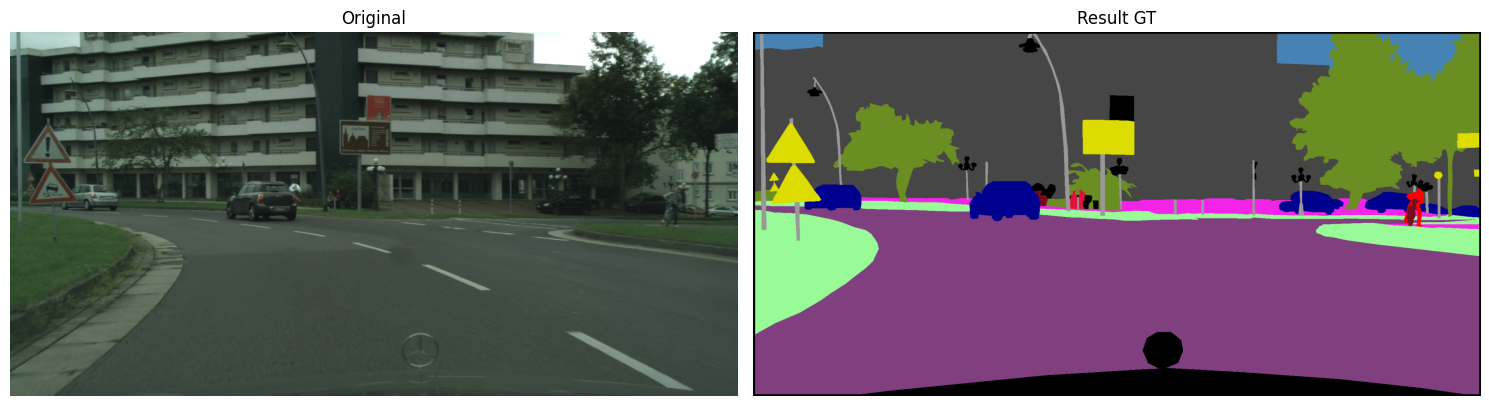

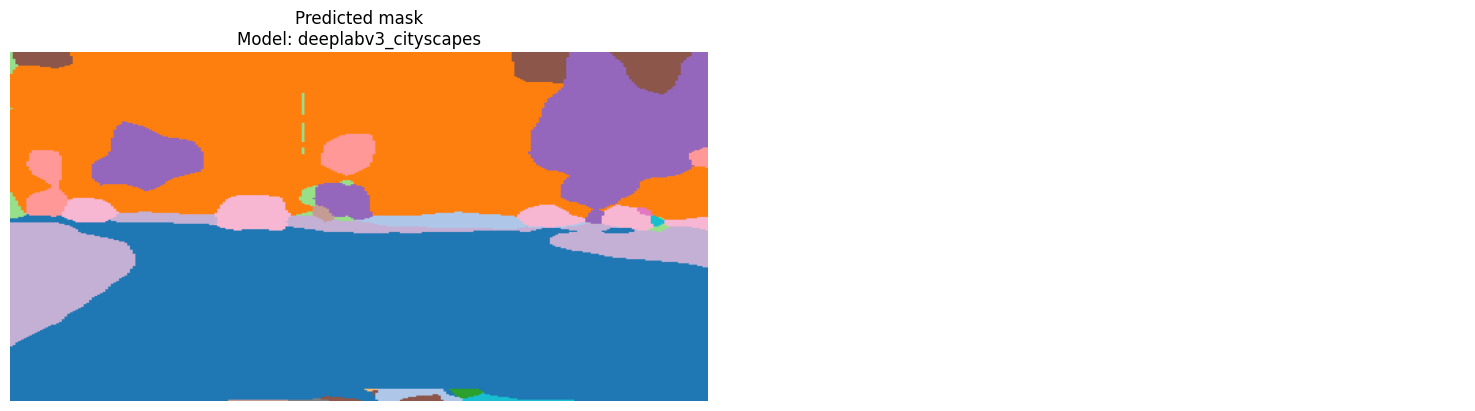

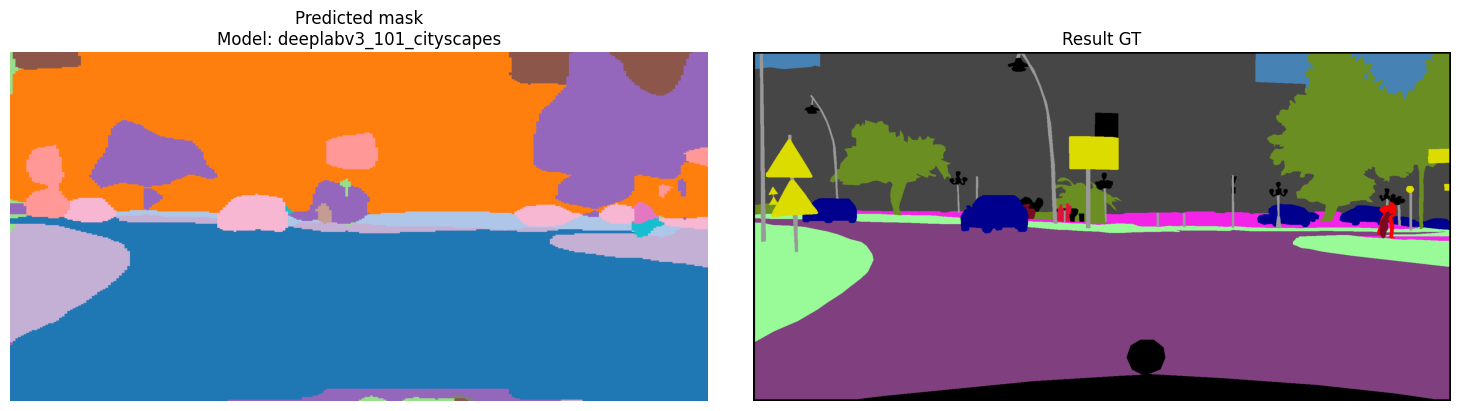

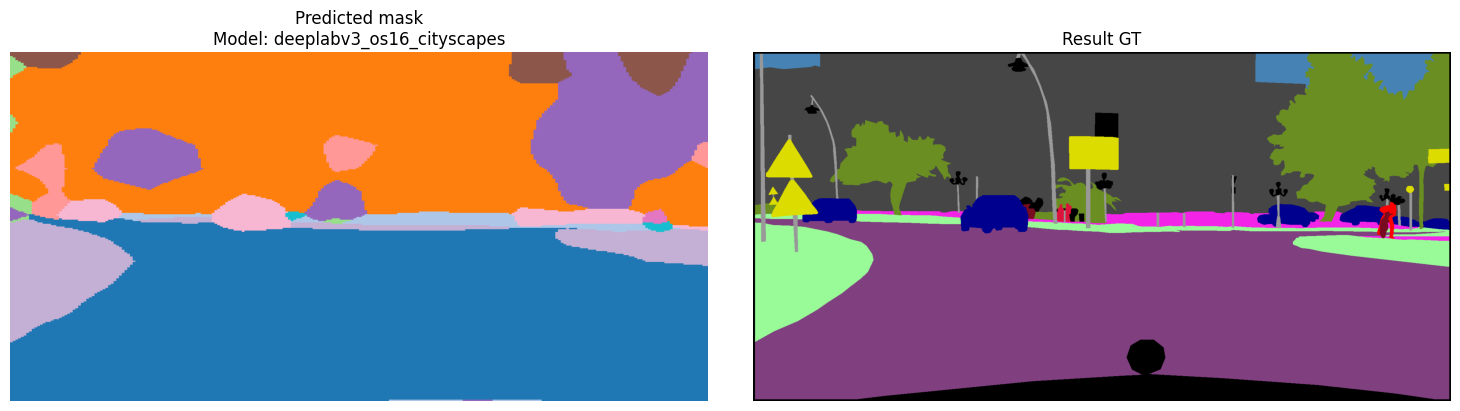

Cityscapes Ablation Visualisation (U-net)


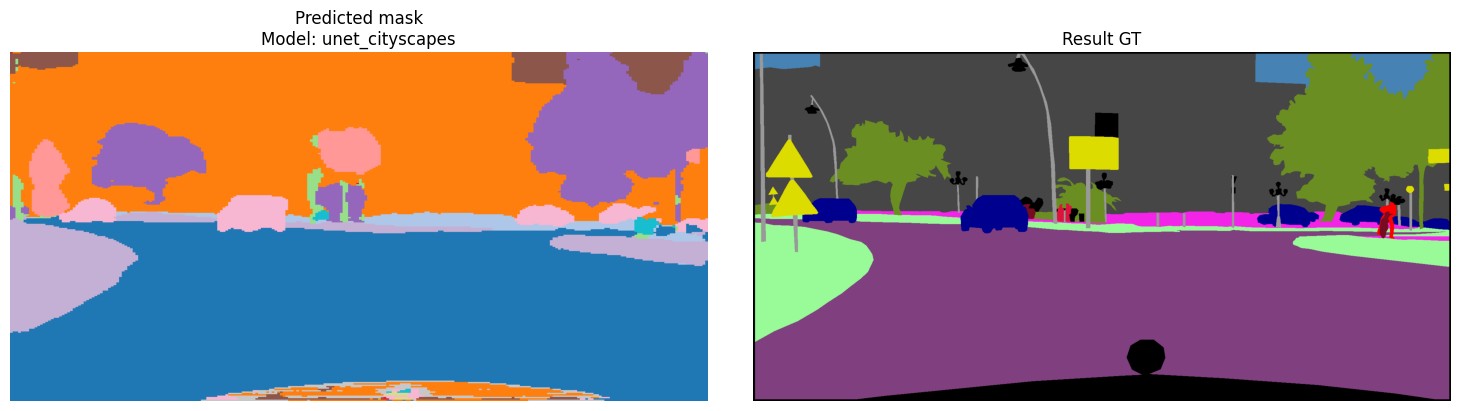

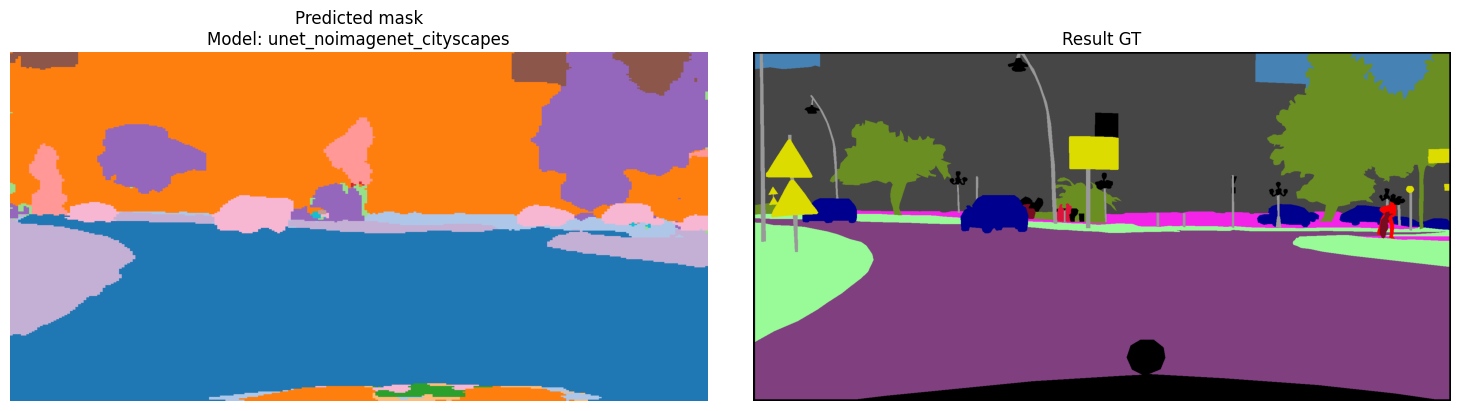

Cityscapes Model Comparison Baseline


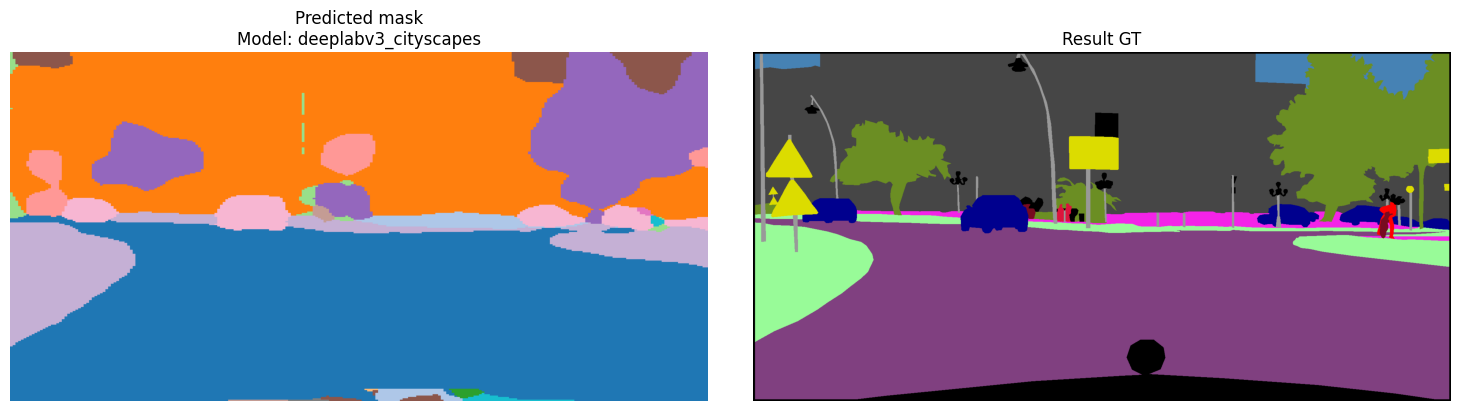

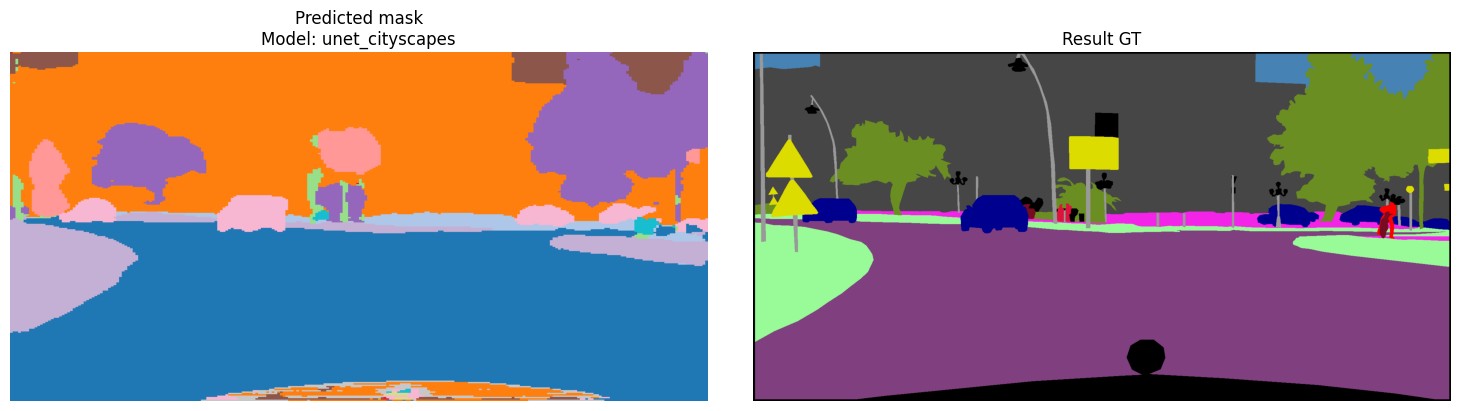

In [15]:
if not TRAIN:
    import torch
    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    import torchvision.transforms.functional as TF
    from torchvision.transforms import InterpolationMode
    
    IMG_PATH = "/kaggle/input/cityscapes/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png" 
    IMG_RESULT_PATH = "/kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_color.png"
    INPUT_SIZE = config["IMG_SIZE"]                 
    ALPHA = 0.6                      # overlay opacity (0..1)

    
    # ---------------- utility: create deterministic colormap ----------------
    def make_colormap(n):
        """
        Create n distinct RGB colors (0..255) using matplotlib tab20 / cycling.
        Returns numpy array shape (n, 3), dtype uint8.
        """
        import matplotlib.pyplot as plt
        base = plt.get_cmap("tab20").colors  # 20 colors
        colors = []
        i = 0
        while len(colors) < n:
            c = base[i % len(base)]
            colors.append((int(c[0]*255), int(c[1]*255), int(c[2]*255)))
            i += 1
        return np.array(colors, dtype=np.uint8)
    
    PALETTE = make_colormap(config["NUM_CLASSES"])
    
    # ---------------- helper: preprocess image like training ----------------
    def preprocess_pil(img_pil, input_size=INPUT_SIZE):
        # img_pil: PIL RGB image
        # Resize (bilinear) to model input and normalize using ImageNet mean/std
        img = img_pil.convert("RGB")
        orig_size = img.size  # (W,H)
        img_resized = img.resize((input_size, input_size), resample=Image.BILINEAR)
        img_np = np.array(img_resized).astype(np.float32) / 255.0
        mean = np.array([0.485, 0.456, 0.406], dtype=np.float32)
        std  = np.array([0.229, 0.224, 0.225], dtype=np.float32)
        img_np = (img_np - mean[None,None,:]) / std[None,None,:]
        # HWC -> CHW
        img_tensor = torch.from_numpy(img_np.transpose(2,0,1)).unsqueeze(0).float()
        return img_tensor, orig_size
    
    # ---------------- helper: map class mask -> color image ----------------
    def mask_to_color(mask_np, palette=PALETTE):
        """
        mask_np: H x W int array with values in [0..NUM_CLASSES-1]
        returns RGB uint8 HxWx3
        """
        h,w = mask_np.shape
        out = np.zeros((h,w,3), dtype=np.uint8)
        for c in range(len(palette)):
            out[mask_np == c] = palette[c]
        return out
    
    # ---------------- run inference on one image ----------------
    def inference_result(img_path, img_result_path, model, device=config["DEVICE"], input_size=INPUT_SIZE, alpha=ALPHA, save_out=True, model_name=""):
        img = Image.open(img_path).convert("RGB")
        img_result = Image.open(img_result_path).convert("RGB")
        inp_tensor, orig_size = preprocess_pil(img, input_size=input_size)
        inp_tensor = inp_tensor.to(device)
    
        with torch.no_grad():
            out = model(inp_tensor)
            # SMP returns logits directly; torchvision deeplab returns dict {'out': logits}
            if isinstance(out, dict) and "out" in out:
                out = out["out"]
            # out shape: 1 x C x H x W
            probs = torch.softmax(out, dim=1)  # optional
            preds = out.argmax(dim=1).squeeze(0).cpu().numpy().astype(np.uint8)  # H x W
    
        # resize prediction mask back to original image size using nearest neighbor
        pred_mask_pil = Image.fromarray(preds)
        pred_mask_resized = pred_mask_pil.resize(orig_size, resample=Image.NEAREST)
        pred_mask_np = np.array(pred_mask_resized)
    
        # colorize
        color_mask = mask_to_color(pred_mask_np, palette=PALETTE)
    
        # create overlay
        img_np = np.array(img).astype(np.uint8)
        overlay = (img_np * (1 - alpha) + color_mask * alpha).astype(np.uint8)

        if save_out:
            Image.fromarray(color_mask).save(f"{model_name}_pred_color.png")
            Image.fromarray(overlay).save(f"{model_name}_overlay.png")
            
        return img_np, color_mask, overlay, np.array(img_result).astype(np.uint8)
        
    
    def visualise_inference(img_np, color_mask, overlay, img_result, model_name,
                    show_original=True, show_mask=True, show_overlay=True, show_gt=True):
        images = []
        titles = []
        if show_original:
            images.append(img_np)
            titles.append("Original")
        if show_mask:
            images.append(color_mask)
            titles.append(f"Predicted mask\nModel: {model_name}")
        if show_overlay:
            images.append(overlay)
            titles.append("Overlay")
        if show_gt:
            images.append(img_result)
            titles.append("Result GT")
    
        # create dynamic subplot layout
        n = len(images)
        cols = 2
        rows = (n + 1) // 2
        fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
        axes = axes.flatten()
    
        for i in range(n):
            axes[i].imshow(images[i])
            axes[i].set_title(titles[i])
            axes[i].axis("off")
    
        # hide unused axes
        for j in range(n, len(axes)):
            axes[j].axis("off")
        
        plt.tight_layout()
        plt.show()

    
    # ---------------- USAGE ----------------
    # Cityscapes Ablation Visualisation
    ## DeeplabV3
    print ("Cityscapes Ablation Visualisation (DeeplabV3)")
    model = deeplabv3_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="deeplabv3_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="deeplabv3_cityscapes",
                    show_original=True, 
                    show_mask=False,
                    show_overlay=False,
                    show_gt=True)
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="deeplabv3_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=False)
    

    model = deeplabv3_101_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="deeplabv3_101_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="deeplabv3_101_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=True)

    model = deeplabv3_os16_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="deeplabv3_os16_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="deeplabv3_os16_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=True)

    ## Unet
    print("Cityscapes Ablation Visualisation (U-net)")
    model = unet_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="unet_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="unet_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=True)
    
    model = unet_noimagenet_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="unet_noimagenet_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="unet_noimagenet_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=True)

    
    # Cityscapes Model Comparison Baseline
    print("Cityscapes Model Comparison Baseline")
    model = deeplabv3_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="deeplabv3_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="deeplabv3_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=True)
    
    model = unet_cityscapes
    model.eval()
    img_np, color_mask, overlay, img_result = inference_result(IMG_PATH, IMG_RESULT_PATH, model, model_name="unet_cityscapes")
    visualise_inference(img_np, color_mask, overlay, img_result, model_name="unet_cityscapes",
                    show_original=False, 
                    show_mask=True,
                    show_overlay=False,
                    show_gt=True)

